Summary Statistics:
            Choice  A_follower_count  A_following_count  A_listed_count  \
count  5500.000000      5.500000e+03       5.500000e+03     5500.000000   
mean      0.509455      6.498840e+05       1.265895e+04     5952.453273   
std       0.499956      2.028787e+06       4.900867e+04    17339.141191   
min       0.000000      1.600000e+01       0.000000e+00        0.000000   
25%       0.000000      2.663750e+03       3.220000e+02       85.000000   
50%       1.000000      4.558900e+04       7.780000e+02      932.000000   
75%       1.000000      3.927380e+05       2.838000e+03     6734.000000   
max       1.000000      3.654319e+07       1.165830e+06   549144.000000   

       A_mentions_received  A_retweets_received  A_mentions_sent  \
count         5.500000e+03          5500.000000      5500.000000   
mean          2.666032e+03          1032.371839         6.011873   
std           2.916543e+04         10954.953223         9.519797   
min           1.005034e-01      

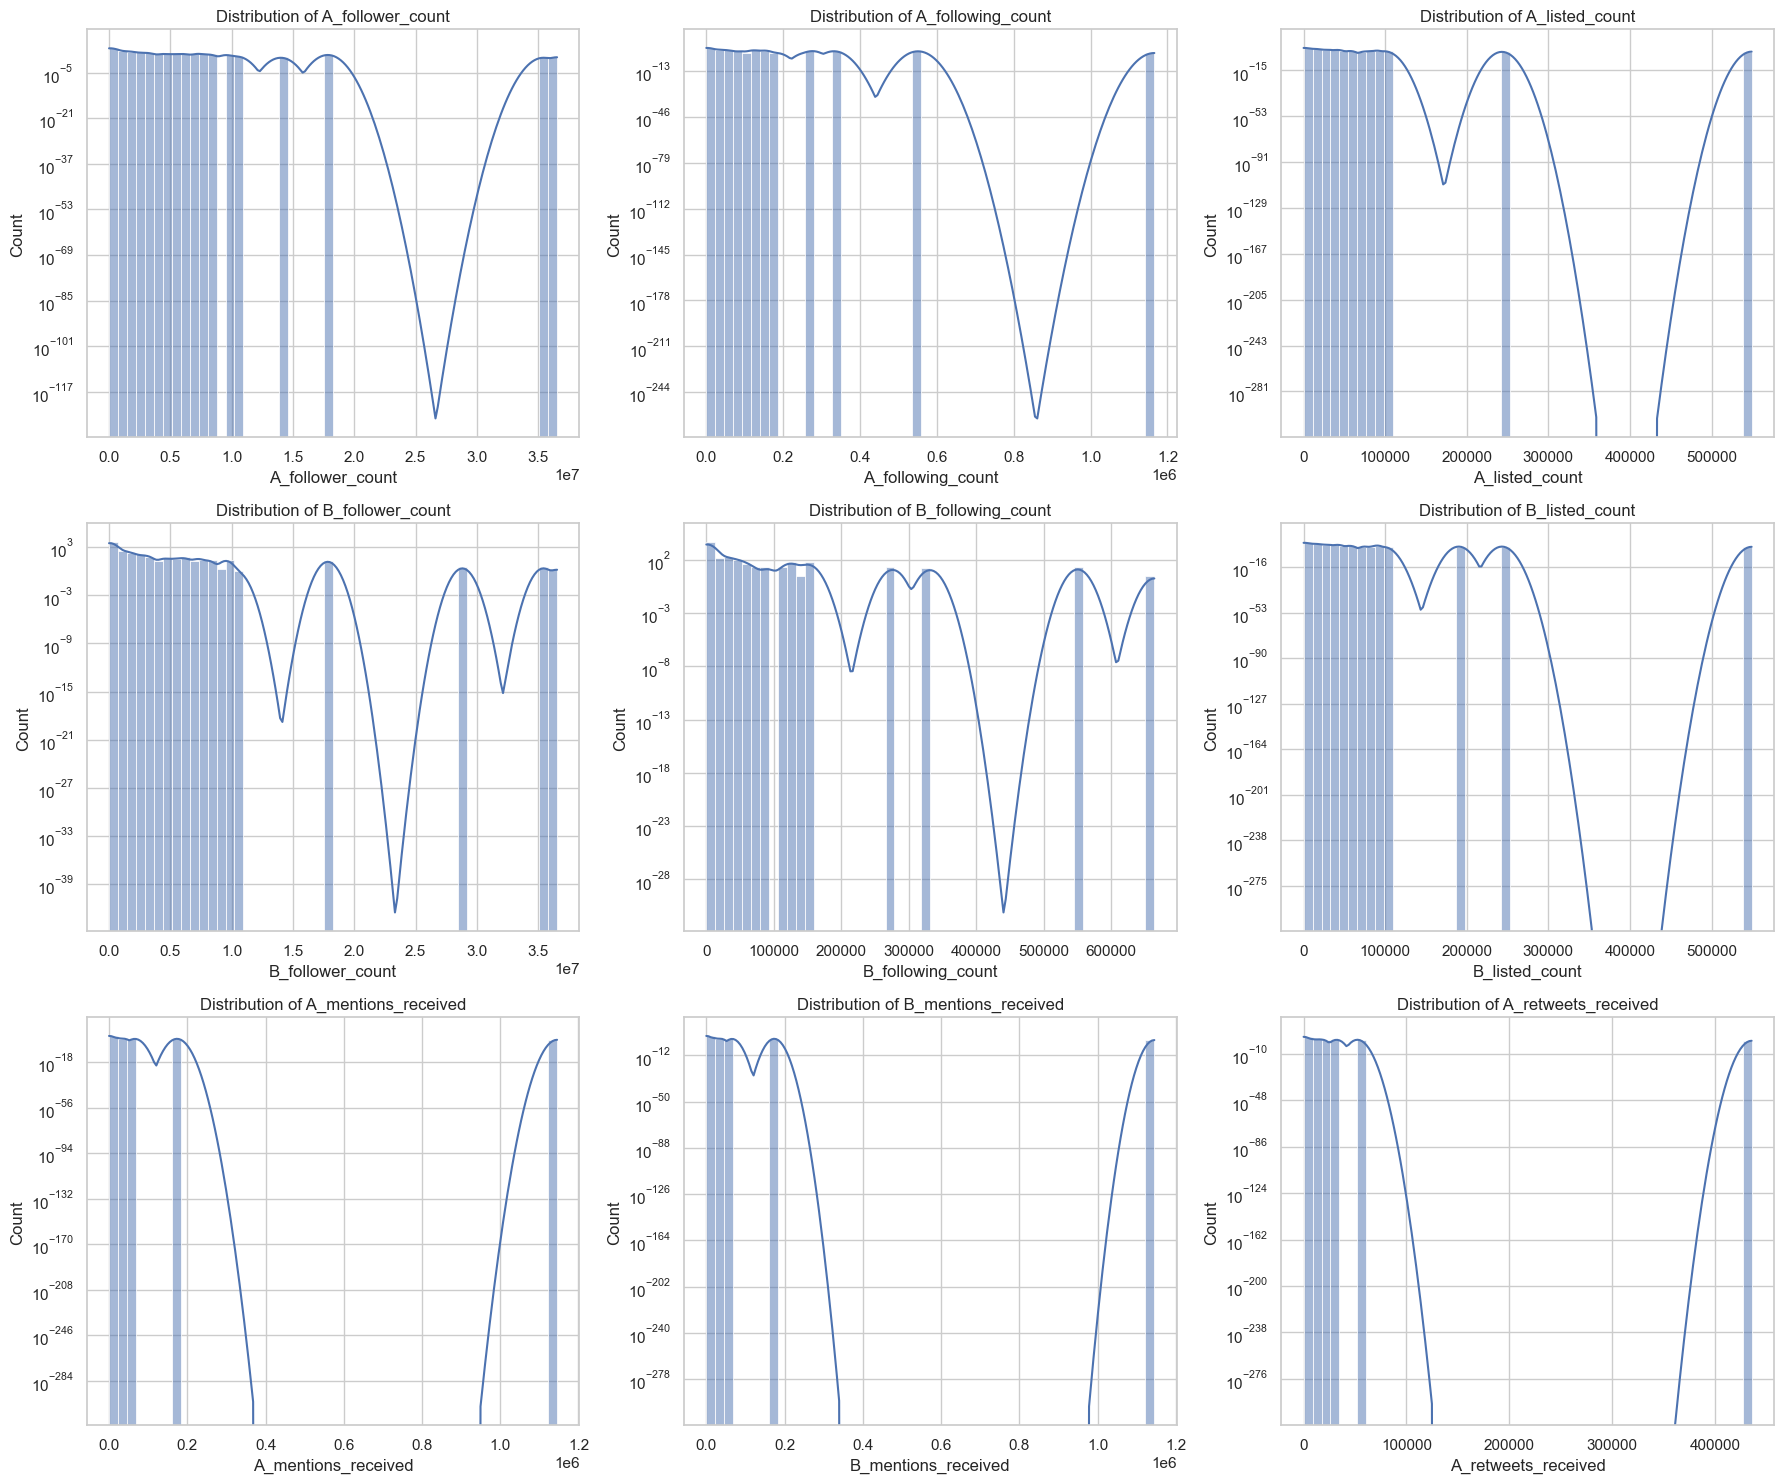

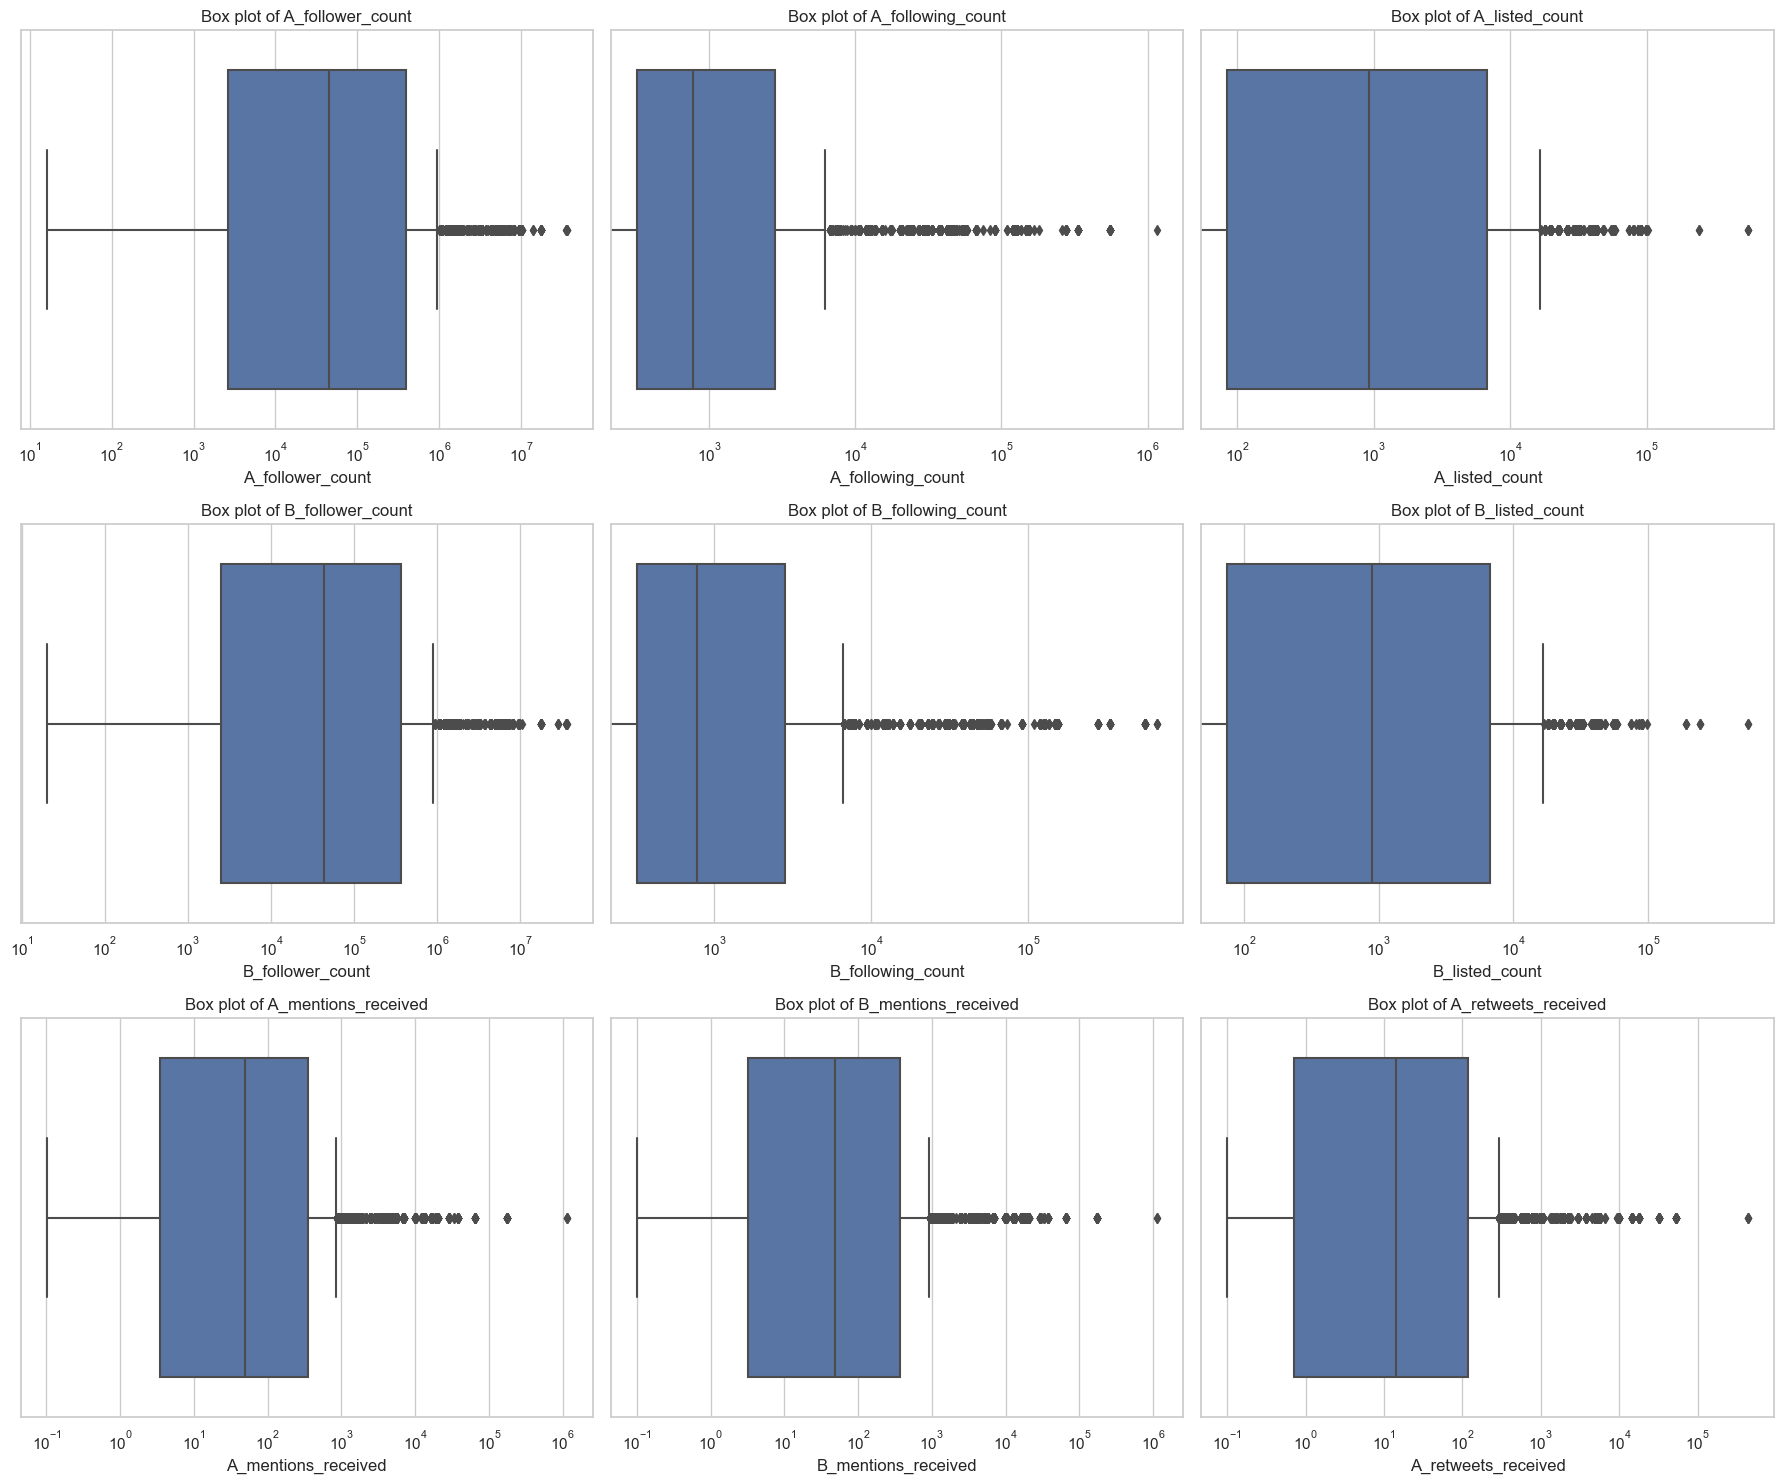

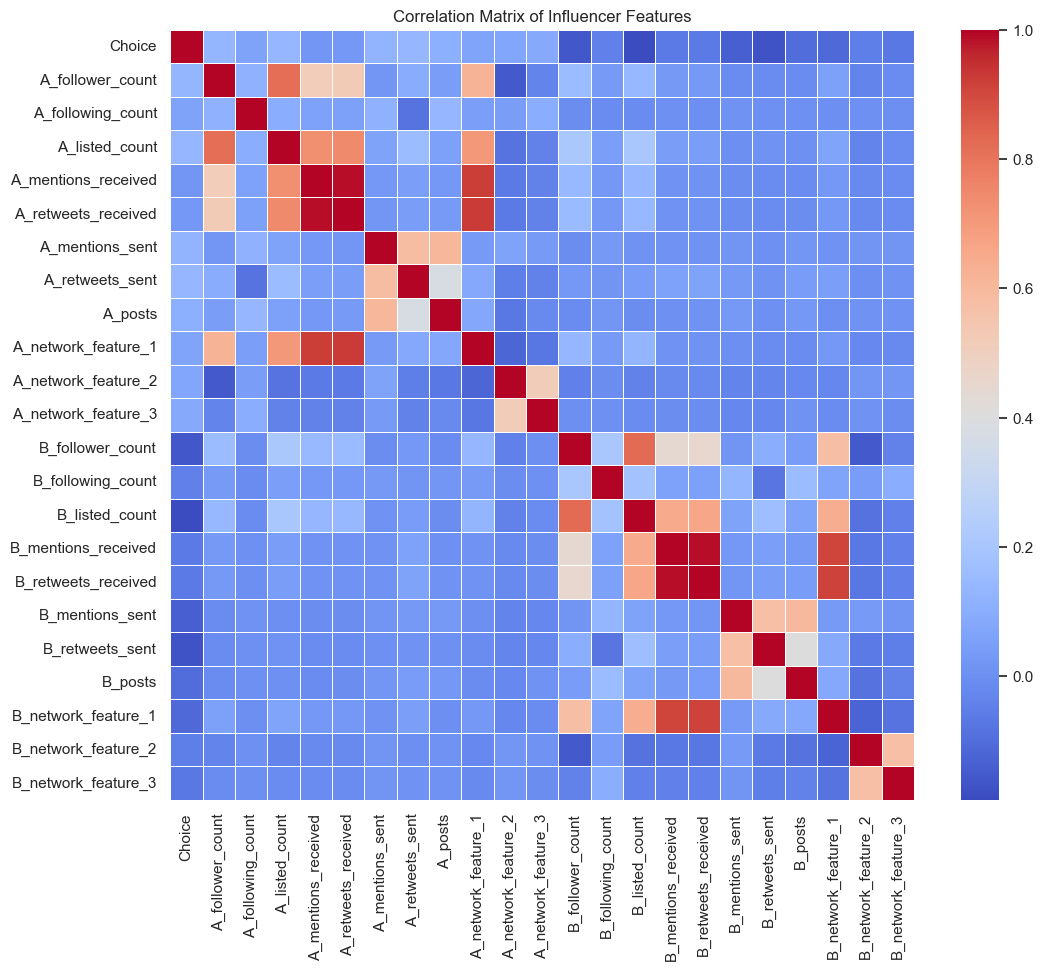

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv('train.csv')

# Summary statistics
print("Summary Statistics:")
print(train_data.describe())

# Distribution of the target variable 'Choice'
print("\nDistribution of the Target Variable 'Choice':")
print(train_data['Choice'].value_counts(normalize=True))

# Visualizing distributions of features
features_to_plot = ['A_follower_count', 'A_following_count', 'A_listed_count',
                    'B_follower_count', 'B_following_count', 'B_listed_count',
                    'A_mentions_received', 'B_mentions_received', 'A_retweets_received']

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.histplot(train_data[feature], ax=ax, bins=50, kde=True)
    ax.set_title(f'Distribution of {feature}')
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.boxplot(x=train_data[feature], ax=ax)
    ax.set_title(f'Box plot of {feature}')
    ax.set_xscale('log')  # Applying logarithmic scale due to wide range of values
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Influencer Features')
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

# Handling outliers with a log transformation for numerical features
numerical_features = ['A_follower_count', 'A_following_count', 'A_listed_count',
                      'B_follower_count', 'B_following_count', 'B_listed_count',
                      'A_mentions_received', 'B_mentions_received', 'A_retweets_received',
                      'B_retweets_received']
for feature in numerical_features:
    train_data[feature] = train_data[feature].apply(lambda x: np.log1p(x))

# Check for missing values and fill them if necessary
# train_data.fillna(train_data.mean(), inplace=True)  # Uncomment if missing values

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_data[numerical_features])
train_data[numerical_features] = scaled_features

pickle.dump(scaler, open('scaler.pkl', 'wb'))
# Splitting the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop(['Choice'], axis=1),
                                                      train_data['Choice'], test_size=0.2, random_state=42)

# Your X_train, X_valid, y_train, y_valid are now ready to be used in machine learning models.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_valid)
logreg_acc = accuracy_score(y_valid, logreg_pred)
print("Logistic Regression Accuracy:", logreg_acc)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_valid)
rf_acc = accuracy_score(y_valid, rf_pred)
print("Random Forest Accuracy:", rf_acc)

# Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_valid)
gbm_acc = accuracy_score(y_valid, gbm_pred)
print("Gradient Boosting Machine Accuracy:", gbm_acc)


C:\Users\dell\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6881818181818182
Random Forest Accuracy: 0.7709090909090909
Gradient Boosting Machine Accuracy: 0.7772727272727272


In [16]:
from sklearn.svm import SVC



# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_valid)
svm_acc = accuracy_score(y_valid, svm_pred)
print("SVM Accuracy:", svm_acc)










SVM Accuracy: 0.7063636363636364


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Neural Network
nn = Sequential()
nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.5))
nn.add(Dense(64, activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.5))
nn.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with an optimizer and a slower learning rate
optimizer = Adam(learning_rate=0.001)
nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

# Evaluate the model
nn_acc = nn.evaluate(X_valid, y_valid, verbose=0)[1]
print("Neural Network Accuracy:", nn_acc)



Epoch 1/100


440/440 [==============================] - 5s 6ms/step - loss: 0.7733 - accuracy: 0.6155 - val_loss: 0.6364 - val_accuracy: 0.7318
Epoch 2/100
440/440 [==============================] - 2s 4ms/step - loss: 0.6664 - accuracy: 0.6441 - val_loss: 0.6289 - val_accuracy: 0.7100
Epoch 3/100
440/440 [==============================] - 2s 4ms/step - loss: 0.6260 - accuracy: 0.6702 - val_loss: 0.6247 - val_accuracy: 0.7182
Epoch 4/100
440/440 [==============================] - 2s 5ms/step - loss: 0.6055 - accuracy: 0.6825 - val_loss: 0.6178 - val_accuracy: 0.7327
Epoch 5/100
440/440 [==============================] - 2s 6ms/step - loss: 0.5943 - accuracy: 0.6955 - val_loss: 0.6114 - val_accuracy: 0.7427
Epoch 6/100
440/440 [==============================] - 2s 5ms/step - loss: 0.5911 - accuracy: 0.6891 - val_loss: 0.5947 - val_accuracy: 0.7491
Epoch 7/100
440/440 [==============================] - 2s 5ms/step - loss: 0.5792 - accuracy: 0.6952 - val_loss: 0.6000 - val_accuracy: 0.7

In [8]:
import pickle

# Save the model to disk
filename = 'finalized_gbm_model.sav'
pickle.dump(gbm, open(filename, 'wb'))


In [9]:
# Load the model from disk
loaded_gbm = pickle.load(open(filename, 'rb'))


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Load your trained scaler and model
scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_gbm = pickle.load(open('finalized_gbm_model.sav', 'rb'))

# Assuming you have loaded your test data
test_data = pd.read_csv('test.csv')

# Apply log transformation if it was done previously
numerical_features = ['A_follower_count', 'A_following_count', 'A_listed_count',
                      'B_follower_count', 'B_following_count', 'B_listed_count',
                      'A_mentions_received', 'B_mentions_received', 'A_retweets_received',
                      'B_retweets_received']
for feature in numerical_features:
    test_data[feature] = test_data[feature].apply(lambda x: np.log1p(x))

# Scale the features using the loaded scaler
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

# Now, the test data is ready for making predictions
test_predictions = loaded_gbm.predict(test_data)

# Optionally, display or save the predictions
print(test_predictions)


[0 1 0 ... 1 0 0]


In [12]:
# Create DataFrame from predictions
predictions_df = pd.DataFrame({
    
    'Predicted': test_predictions
})

# Save the predictions to a CSV file
predictions_df.to_csv('test_predictions.csv', index=False)

In [13]:
test_predictions

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)